In [38]:
import torchvision.models as models

In [39]:
all_models = dir (models)

classification_models = [model for model in all_models if not model.startswith("_")]

print(classification_models)

['AlexNet', 'AlexNet_Weights', 'ConvNeXt', 'ConvNeXt_Base_Weights', 'ConvNeXt_Large_Weights', 'ConvNeXt_Small_Weights', 'ConvNeXt_Tiny_Weights', 'DenseNet', 'DenseNet121_Weights', 'DenseNet161_Weights', 'DenseNet169_Weights', 'DenseNet201_Weights', 'EfficientNet', 'EfficientNet_B0_Weights', 'EfficientNet_B1_Weights', 'EfficientNet_B2_Weights', 'EfficientNet_B3_Weights', 'EfficientNet_B4_Weights', 'EfficientNet_B5_Weights', 'EfficientNet_B6_Weights', 'EfficientNet_B7_Weights', 'EfficientNet_V2_L_Weights', 'EfficientNet_V2_M_Weights', 'EfficientNet_V2_S_Weights', 'GoogLeNet', 'GoogLeNetOutputs', 'GoogLeNet_Weights', 'Inception3', 'InceptionOutputs', 'Inception_V3_Weights', 'MNASNet', 'MNASNet0_5_Weights', 'MNASNet0_75_Weights', 'MNASNet1_0_Weights', 'MNASNet1_3_Weights', 'MaxVit', 'MaxVit_T_Weights', 'MobileNetV2', 'MobileNetV3', 'MobileNet_V2_Weights', 'MobileNet_V3_Large_Weights', 'MobileNet_V3_Small_Weights', 'RegNet', 'RegNet_X_16GF_Weights', 'RegNet_X_1_6GF_Weights', 'RegNet_X_32GF_

In [41]:
import torch.nn as nn

# without the pretrained, it'll only be the structure and no training

AlexNetmodel = models.alexnet(pretrained=True)
AlexNetmodel

In [42]:
 for i, layer in  enumerate(AlexNetModel.classifier):
    layer_type = type(layer)
    if isinstance(layer, nn.Linear):
        print(i, layer_type)
    else:
        print(i, layer_type)

#   enumerate(AlexNetModel.classifier)


0 <class 'torch.nn.modules.dropout.Dropout'>
1 <class 'torch.nn.modules.linear.Linear'>
2 <class 'torch.nn.modules.activation.ReLU'>
3 <class 'torch.nn.modules.dropout.Dropout'>
4 <class 'torch.nn.modules.linear.Linear'>
5 <class 'torch.nn.modules.activation.ReLU'>
6 <class 'torch.nn.modules.linear.Linear'>


In [43]:
sum(p.numel() for p in AlexNetModel.parameters())

61100840

In [44]:
# Freeze Feature Params
# we freeze because we are doing a Transfer Learning
# Which is using pre-trained model to fine-tune the later layers or add new layers for a specific task
for param in AlexNetmodel.parameters():
    param.requires_grad = False

# Important
# In your training loop, only the new layers’ parameters will be updated during training
# only update the parameters of the new classifier layers, not the frozen convolutional layers (upcoming)

In [45]:
sum(p.numel() for p in AlexNetModel.parameters() if p.requires_grad)

0

In [46]:
from torch.utils.data import DataLoader, random_split # Important for splitting

from torchvision import datasets, transforms
# to split the data
from sklearn.model_selection import train_test_split

In [47]:
root = 'data/Fruit_Classification'

# test_root = 'data/Fruit_Classification/test'


train_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15), # so , randomly roatet some of th images upt o 15 degrees
    transforms.RandomHorizontalFlip(), # randomly flip some
    transforms.Resize(224), # resize the shortest side to 224
    transforms.CenterCrop(224), # crop the image to 224 (224 X 224)
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),

        # standard deviation and mean found from largest image datasets
])

test_transform = transforms.Compose([
    transforms.Resize(224), # resize the shortest side to 224
    transforms.CenterCrop(224), # crop the image to 224 (224 X 224)
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),

        # standard deviation and mean found from largest image datasets
])


full_dataset = datasets.ImageFolder(root=root, transform=train_transform)


# Calculate the number of samples for training and testing
test_size = int(0.1 * len(full_dataset))  # 10% for testing
train_size = len(full_dataset) - test_size

# Split the dataset into training and testing subsets
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Print the sizes to verify
print(f'Training data size: {len(train_loader.dataset)}')
print(f'Testing data size: {len(test_loader.dataset)}')


Training data size: 15169
Testing data size: 1685


In [49]:
print (len(class_names))

33


In [52]:
import torch

In [53]:
# modify classifier
# Note that when we assign new layers, their parameters default to .requires_grad=True
torch.manual_seed(42)

AlexNetmodel.classifier = nn.Sequential(nn.Linear(9216, 1024), # 9216 is what currently has benn inputed
                                 nn.ReLU(),
                                 nn.Dropout(0.4),
                                 nn.Linear(1024, 33), # reduce it to 33
                                 # there are 33 classes in Fruites
                                 nn.LogSoftmax(dim=1))

# now you can see that we have replaced that last layer with our own layer
AlexNetmodel

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, 

In [54]:
# These are the TRAINABLE parameters:
# count parameters
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>8}')
    print(f'________\n{sum(params):>8}')
    
count_parameters(AlexNetmodel)

# here, we reduce it to what we want -> two classifications
# only the last few parts will be trained now

 9437184
    1024
   33792
      33
________
 9472033


In [55]:
# Loss Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(AlexNetmodel.classifier.parameters(), lr=0.001)

In [56]:
import matplotlib.pyplot as plt

Batch loss: 3.5814
Batch loss: 4.9969
Batch loss: 3.6691
Batch loss: 2.9713
Batch loss: 3.1601
Batch loss: 2.4097
Batch loss: 2.4123
Batch loss: 2.2211
Batch loss: 0.9333
Batch loss: 1.0623
Batch loss: 0.5638
Batch loss: 0.7398
Batch loss: 0.4904
Batch loss: 0.6787
Batch loss: 0.4574
Batch loss: 0.4585
Batch loss: 0.4623
Batch loss: 0.3116
Batch loss: 0.4216
Batch loss: 0.8142
Batch loss: 0.2110
Batch loss: 0.2374
Batch loss: 0.2576
Batch loss: 0.1098
Batch loss: 0.2724
Batch loss: 0.1557
Batch loss: 0.1839
Batch loss: 0.1934
Batch loss: 0.0949
Batch loss: 0.2361
Batch loss: 0.2823
Batch loss: 0.2142
Batch loss: 0.1175
Batch loss: 0.0625
Batch loss: 0.1153
Batch loss: 0.1543
Batch loss: 0.1105
Batch loss: 0.1262
Batch loss: 0.2018
Batch loss: 0.0847
Batch loss: 0.1617
Batch loss: 0.0630
Batch loss: 0.0588
Batch loss: 0.0330
Batch loss: 0.0837
Batch loss: 0.0831
Batch loss: 0.1356
Batch loss: 0.0248
Batch loss: 0.0395
Batch loss: 0.0206
Batch loss: 0.0226
Batch loss: 0.1025
Batch loss: 

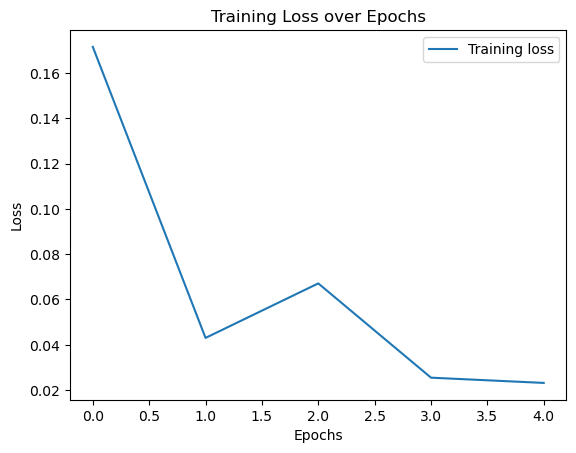

In [57]:
# Set number of epochs
epochs = 5

# Initialize list to store loss values
train_losses = []

# Train the model
for epoch in range(epochs):
    AlexNetmodel.train()
    running_loss = 0.0
    
    for batch in train_loader:
        inputs, labels = batch
        
        # Forward pass
        y_pred = AlexNetmodel(inputs)
        
        # Compute loss
        loss = criterion(y_pred, labels)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        # Collect the loss
        running_loss += loss.item()
        # print batch loss
        print(f'Batch loss: {loss.item():.4f}')
    
    # Average loss for the epoch
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

# Plot the training loss
plt.plot(train_losses, label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

Test Loss: 0.0022, Test Accuracy: 99.88%


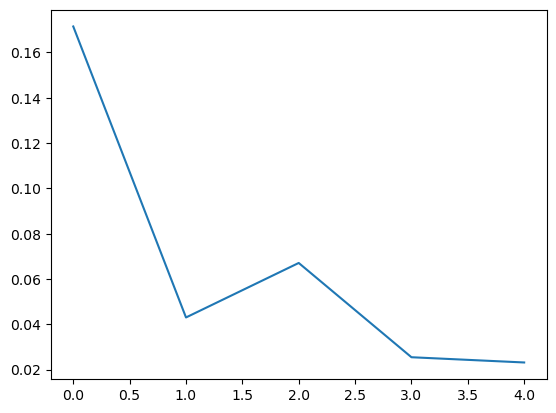

In [58]:
# validate the model 
AlexNetmodel.eval()

# Initialize variables to track the loss and accuracy
test_loss = 0.0
correct = 0
total = 0

# Disable gradient computation for validation
with torch.no_grad():
    for batch in test_loader:
        inputs, labels = batch
        # Forward pass
        outputs = AlexNetmodel(inputs)
        
        # Compute loss
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        
        # Calculate predictions
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate average loss and accuracy
avg_loss = test_loss / len(test_loader)
accuracy = correct / total * 100

print(f'Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%')

# plot loss
plt.plot(train_losses, label='Training loss')


## Exporting the Model

In [59]:
import torch.onnx

# Define a dummy input tensor with the same shape as your training data
dummy_input = torch.randn(1, 3, 224, 224)  # Batch size 1, 3 color channels, 224x224 image size

# Export the model to ONNX format
onnx_model_path = 'alexnet_fruit_classification.onnx'
torch.onnx.export(AlexNetmodel, dummy_input, onnx_model_path, 
                  input_names=['input'], output_names=['output'], 
                  opset_version=11)

### Testing the model

In [64]:
for batch in test_loader:
    inputs, labels = batch
    break

inputs[0].shape
# this is the shape of the input. A single image

torch.Size([3, 224, 224])

In [66]:
for b, (X, y) in enumerate (train_loader):
    break

X.shape

# torch.Size([10, 3, 224, 224]) -> Batch Size , Channels, Width and Height

torch.Size([64, 3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


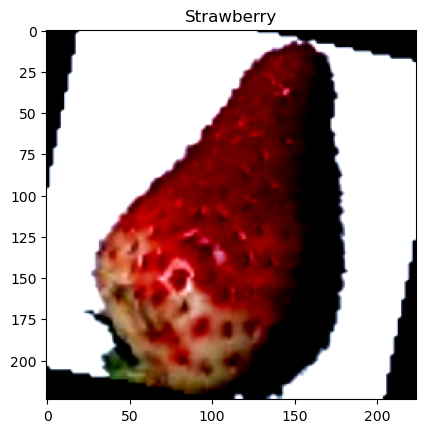

In [68]:
import numpy as np


# Display one image from the batch
def imshow(img, title):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

# Get one image and its label
img = X[2]  # The first image in the batch
label = y[2]  # The corresponding label

# Display the image
imshow(img, class_names[label])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

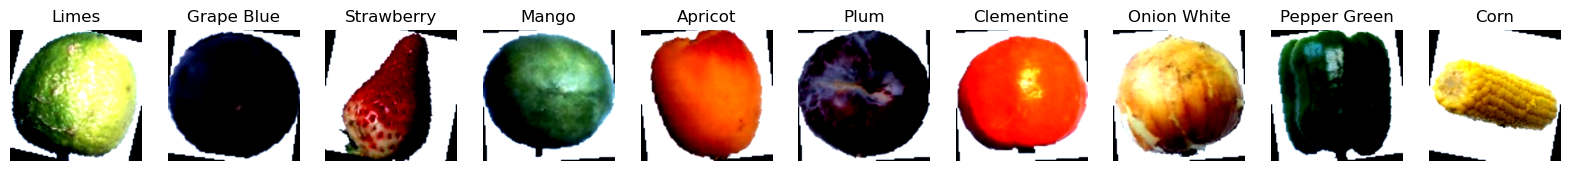

In [69]:
# Function to show an image
def imshow(img, ax, title):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)))
    ax.set_title(title)
    ax.axis('off')

# Display all ten images in a row with their labels
fig, axes = plt.subplots(1, 10, figsize=(20, 2))

for i in range(10):
    img = X[i]  # Get the ith image in the batch
    label = y[i]  # Get the corresponding label
    imshow(img, axes[i], class_names[label])

plt.show()

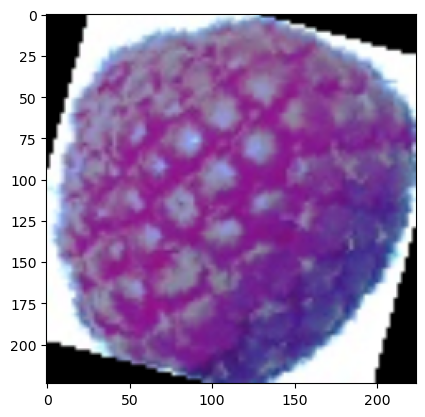

In [71]:
# new image
x = 2019

# Inverse normalize the images
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)


im = inv_normalize(test_data[x][0])
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


45


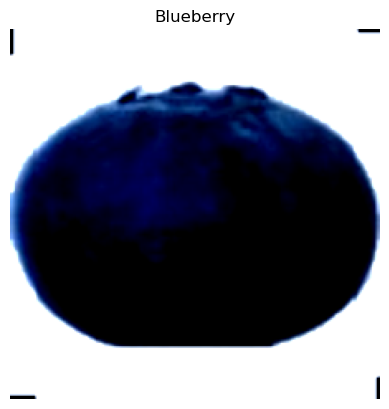

In [73]:
import random

# Load a batch of images from the test_loader
for b, (X, y) in enumerate(test_loader):
    break

random_idx = random.randint(0, X.size(0) - 1)
print(random_idx)


# Get the random image and its label
img = X[random_idx]
label = y[random_idx]

# Function to show an image
def imgshow(img, title):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display the image
imgshow(img, class_names[label])

In [74]:
full_dataset.classes[label]

'Blueberry'